In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

In [2]:
#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("./Resources/charity_data.csv")
application_df.head()

EIN                                      NAME APPLICATION_TYPE  \
0  10520599              BLUE KNIGHTS MOTORCYCLE CLUB              T10   
1  10531628    AMERICAN CHESAPEAKE CLUB CHARITABLE TR               T3   
2  10547893        ST CLOUD PROFESSIONAL FIREFIGHTERS               T5   
3  10553066            SOUTHSIDE ATHLETIC ASSOCIATION               T3   
4  10556103  GENETIC RESEARCH INSTITUTE OF THE DESERT               T3   

        AFFILIATION CLASSIFICATION      USE_CASE  ORGANIZATION  STATUS  \
0       Independent          C1000    ProductDev   Association       1   
1       Independent          C2000  Preservation  Co-operative       1   
2  CompanySponsored          C3000    ProductDev   Association       1   
3  CompanySponsored          C2000  Preservation         Trust       1   
4       Independent          C1000     Heathcare         Trust       1   

      INCOME_AMT SPECIAL_CONSIDERATIONS  ASK_AMT  IS_SUCCESSFUL  
0              0                      N     5000              1  
1         1-9999                      N   108590              1  
2              0                      N     5000              0  
3    10000-24999                      N     6692              1  
4  100000-499999                      N   142590              1

In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN', 'NAME'], axis=1)
                                     
application_df.head()

APPLICATION_TYPE       AFFILIATION CLASSIFICATION      USE_CASE  \
0              T10       Independent          C1000    ProductDev   
1               T3       Independent          C2000  Preservation   
2               T5  CompanySponsored          C3000    ProductDev   
3               T3  CompanySponsored          C2000  Preservation   
4               T3       Independent          C1000     Heathcare   

   ORGANIZATION  STATUS     INCOME_AMT SPECIAL_CONSIDERATIONS  ASK_AMT  \
0   Association       1              0                      N     5000   
1  Co-operative       1         1-9999                      N   108590   
2   Association       1              0                      N     5000   
3         Trust       1    10000-24999                      N     6692   
4         Trust       1  100000-499999                      N   142590   

   IS_SUCCESSFUL  
0              1  
1              1  
2              0  
3              1  
4              1

In [4]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [5]:
# Look at APPLICATION_TYPE value counts for binning
application_count = application_df.APPLICATION_TYPE.value_counts()
application_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(application_count[application_count<150].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
Other      120
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
classification_count = application_df.CLASSIFICATION.value_counts()
classification_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [8]:
# You may find it helpful to look at CLASSIFICATION value counts >1
class_count_1 = application_df['CLASSIFICATION'].value_counts().loc[lambda x : x>1]
class_count_1

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [9]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(classification_count[classification_count < 200].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1197
C7000      777
C1700      287
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists
app_category = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
app_category

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [12]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df,dtype=float)
application_df.head()

STATUS  ASK_AMT  IS_SUCCESSFUL  APPLICATION_TYPE_Other  \
0       1     5000              1                     0.0   
1       1   108590              1                     0.0   
2       1     5000              0                     0.0   
3       1     6692              1                     0.0   
4       1   142590              1                     0.0   

   APPLICATION_TYPE_T10  APPLICATION_TYPE_T19  APPLICATION_TYPE_T3  \
0                   1.0                   0.0                  0.0   
1                   0.0                   0.0                  1.0   
2                   0.0                   0.0                  0.0   
3                   0.0                   0.0                  1.0   
4                   0.0                   0.0                  1.0   

   APPLICATION_TYPE_T4  APPLICATION_TYPE_T5  APPLICATION_TYPE_T6  ...  \
0                  0.0                  0.0                  0.0  ...   
1                  0.0                  0.0                  0.0  ...   
2                  0.0                  1.0                  0.0  ...   
3                  0.0                  0.0                  0.0  ...   
4                  0.0                  0.0                  0.0  ...   

   INCOME_AMT_1-9999  INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  \
0                0.0                     0.0                       0.0   
1                1.0                     0.0                       0.0   
2                0.0                     0.0                       0.0   
3                0.0                     1.0                       0.0   
4                0.0                     0.0                       1.0   

   INCOME_AMT_10M-50M  INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  \
0                 0.0               0.0                     0.0   
1                 0.0               0.0                     0.0   
2                 0.0               0.0                     0.0   
3                 0.0               0.0                     0.0   
4                 0.0               0.0                     0.0   

   INCOME_AMT_50M+  INCOME_AMT_5M-10M  SPECIAL_CONSIDERATIONS_N  \
0              0.0                0.0                       1.0   
1              0.0                0.0                       1.0   
2              0.0                0.0                       1.0   
3              0.0                0.0                       1.0   
4              0.0                0.0                       1.0   

   SPECIAL_CONSIDERATIONS_Y  
0                       0.0  
1                       0.0  
2                       0.0  
3                       0.0  
4                       0.0  

[5 rows x 47 columns]

In [15]:
# Split our preprocessed data into our features and target arrays
y = application_df.IS_SUCCESSFUL.values
X = application_df.drop(columns="IS_SUCCESSFUL").values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [16]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Step 2: Compile, Train, and Evaluate the Model

In [18]:
# Define the model - deep neural net, i.e., the number of input features and 
# hidden nodes for each layer.

n_input_features = len(X_train_scaled[0])
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim = n_input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=30, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 80)                3760      
                                                                 
 dense_4 (Dense)             (None, 30)                2430      
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 6,221
Trainable params: 6,221
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [20]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 3s 2ms/step - loss: 0.5690 - accuracy: 0.7191
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5540 - accuracy: 0.7310
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5522 - accuracy: 0.7306
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5507 - accuracy: 0.7312
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5487 - accuracy: 0.7321
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5479 - accuracy: 0.7327
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5469 - accuracy: 0.7338
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5461 - accuracy: 0.7343
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5457 - accuracy: 0.7358
Epoch 10/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5451 - accura

804/804 [==============================] - 2s 2ms/step - loss: 0.5345 - accuracy: 0.7416
Epoch 82/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5343 - accuracy: 0.7418
Epoch 83/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5346 - accuracy: 0.7412
Epoch 84/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5343 - accuracy: 0.7424
Epoch 85/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5344 - accuracy: 0.7407
Epoch 86/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5341 - accuracy: 0.7418
Epoch 87/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5344 - accuracy: 0.7413
Epoch 88/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5344 - accuracy: 0.7410
Epoch 89/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5340 - accuracy: 0.7414
Epoch 90/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5343 - accuracy: 

In [21]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5558 - accuracy: 0.7258 - 635ms/epoch - 2ms/step
Loss: 0.5558115243911743, Accuracy: 0.7258309125900269


In [22]:
# Export our model to HDF5 file
nn.save("./Resources/AlphabetSoupCharity1.h5")

# Step 4: Write a Report on the Neural Network Model

1. Overview of the analysis: Explain the purpose of this analysis.
    The purpose of the charity funding analysis for Alphabet Soup was to predict where the company would approve/make investments. Our goal was to use machine learning and neural networks to apply target/features on the dataset, create a binary classifier that was capable of predicting whether investors would be successful if funded by Alphabet Soup. We started with 34,000 organizations and 12 columns that captured the metadata about each organization and their past funding outcomes.

2. Results: Using bulleted lists and images to support your answers, address the following questions.


Data Preprocessing

    After dropping EIN and NAME the remaining columns were to be considered features for the model. Name was added back into the second test for bining purposes. The data was then split for training and testing sets. The target variable for the model was labeled "IS_SUCCESSFUL" and has the value of 1 for yes and 0 for no. APPLICATION data was analyzed and "CLASSIFICATION" value was used for binning. We used Several data points as a cutoff to bin "rare" variables. Categorical variables were encoded by get_dummies() after checking to see if the binning was successful. 

Compiling, Training, and Evaluating the Model

How many neurons, layers, and activation functions did you select for your neural network model, and why?
Were you able to achieve the target model performance?
What steps did you take in your attempts to increase model performance?

6,221 Parameters were created by a three-layer training model.
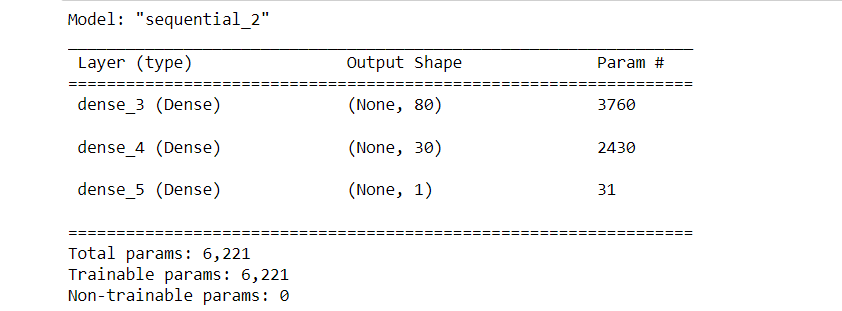




   

Multiple layers should be used for deep learning models, since it learns how to predict and classify information based on computer filtering inputs through layers.
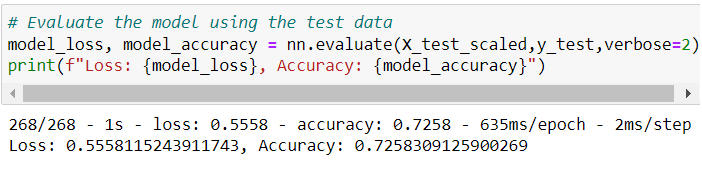

3. Summary: Summarize the overall results of the deep learning model. Include a recommendation for how a different model could solve this classification problem, and then explain your recommendation.

The model's best result employing the different numbers of neurons and layers was a 72.7% accuracy for the relu and sigmoid activations. Since the random forest classifier is less affected by outliers, it should be the next step. Recommendation: Reduce epoch between 20-50.